In [1]:
import gmsh
import numpy as np

el metodo initialize 'abre' el programa.

In [2]:
gmsh.initialize()

Info    : Increasing process stack size (8192 kB < 16 MB)


'armamos' el modelo que queremos modificar:

In [3]:
modelname = 'chapa_asimetrica'

In [4]:
gmsh.model.add(modelname)

In [5]:
L = 10
lc = L

Definimos las coordenadas de los puntos

In [6]:
p1 = gmsh.model.geo.addPoint(0, 0, 0, 2*L/10) #*2)
p2 = gmsh.model.geo.addPoint(2*L, 0, 0, 2*L) #/2) 
p3 = gmsh.model.geo.addPoint(2*L, L, 0, 2*L) #*5) 
p4 = gmsh.model.geo.addPoint(0, L, 0, 2*L/10) #/5) 

Luego definimos las lineas

In [7]:
l1 = gmsh.model.geo.addLine(p1, p2)
l2 = gmsh.model.geo.addLine(p2, p3)
l3 = gmsh.model.geo.addLine(p3, p4)
l4 = gmsh.model.geo.addLine(p4, p1)

Las curvas nos van a servir para definir los bordes de nuestro modelo.

In [8]:
C1 = gmsh.model.geo.addCurveLoop([l1, l2, l3, l4])

Y las superficies:

In [9]:
S1 = gmsh.model.geo.addPlaneSurface([C1])

le avisamos que ya estan todos los elementos geométricos:

In [10]:
gmsh.model.geo.synchronize()

Ahora definimos algo que nos va a servir para las condiciones de contorno.

Y definimos `Grupos Físicos` para definir bordes, etc

In [11]:
Empotrado = gmsh.model.addPhysicalGroup(1, [l4])
gmsh.model.setPhysicalName(1,Empotrado,'Empotrado')

In [12]:
Traccionado = gmsh.model.addPhysicalGroup(1, [l2])
gmsh.model.setPhysicalName(1,Traccionado,'Traccionado')

In [13]:
Superficie = gmsh.model.addPhysicalGroup(2,[S1])
gmsh.model.setPhysicalName(2,Superficie, 'Superficie')

Finalemente generamos el mallado

In [14]:
gmsh.model.mesh.generate(2)

Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 30%] Meshing curve 2 (Line)
Info    : [ 50%] Meshing curve 3 (Line)
Info    : [ 80%] Meshing curve 4 (Line)
Info    : Done meshing 1D (Wall 0.00274018s, CPU 0.003279s)
Info    : Meshing 2D...
Info    : Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 0.00571256s, CPU 0.002113s)
Info    : 33 nodes 68 elements


In [15]:
gmsh.fltk.run()

-------------------------------------------------------
Version       : 4.8.4
License       : GNU General Public License
Build OS      : Linux64-sdk
Build date    : 20210428
Build host    : gmsh.info
Build options : 64Bit ALGLIB ANN Bamg Blas[petsc] Blossom Cgns DIntegration Dlopen DomHex Eigen Fltk Gmm Hxt Jpeg[fltk] Kbipack Lapack[petsc] LinuxJoystick MathEx Med Mesh Metis Mmg Mpeg Netgen ONELAB ONELABMetamodel OpenCASCADE OpenCASCADE-CAF OpenGL OptHom PETSc Parser Plugins Png[fltk] Post QuadTri Solver TetGen/BR Voro++ Zlib[fltk]
FLTK version  : 1.4.0
PETSc version : 3.14.4 (real arithmtic)
OCC version   : 7.6.0
MED version   : 4.1.0
Packaged by   : geuzaine
Web site      : https://gmsh.info
Issue tracker : https://gitlab.onelab.info/gmsh/gmsh/issues
-------------------------------------------------------


# El objeto mesh

El mallado es un objeto del cual podemos recuperar la información necesaria para interactuar con nuestro motor de elementos finitos. Por ejemplo para la informacion de los nodos:

In [16]:
NodeInfo = gmsh.model.mesh.get_nodes()

In [17]:
NodeInfo[1].shape

(99,)

In [18]:
NodeInfo

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33],
       dtype=uint64),
 array([ 0.        ,  0.        ,  0.        , 20.        ,  0.        ,
         0.        , 20.        , 10.        ,  0.        ,  0.        ,
        10.        ,  0.        ,  2.02495291,  0.        ,  0.        ,
         4.75034346,  0.        ,  0.        ,  8.41845537,  0.        ,
         0.        , 13.35537932,  0.        ,  0.        , 13.35537932,
        10.        ,  0.        ,  8.41845537, 10.        ,  0.        ,
         4.75034346, 10.        ,  0.        ,  2.02495291, 10.        ,
         0.        ,  0.        ,  8.        ,  0.        ,  0.        ,
         6.        ,  0.        ,  0.        ,  4.        ,  0.        ,
         0.        ,  2.        ,  0.        ,  1.81670355,  5.07522757,
         0.        ,  5.90849776,  7.17305762,  0.        , 10.68517452,
         3.6393624 ,  0.  

esta variable node info guarda:
- los numeros de nodo
- la matriz de nodo

In [19]:
NumeroNodos = NodeInfo[0].shape[0]

In [20]:
NumeroNodos

33

es la cantidad de nodos del modelo.

La matriz de nodos es dada en lista, nos conviene pasarla a matriz para tener lo que venimos trabajando:

In [21]:
MN = NodeInfo[1].reshape(NumeroNodos , 3)

In [22]:
MN

array([[ 0.        ,  0.        ,  0.        ],
       [20.        ,  0.        ,  0.        ],
       [20.        , 10.        ,  0.        ],
       [ 0.        , 10.        ,  0.        ],
       [ 2.02495291,  0.        ,  0.        ],
       [ 4.75034346,  0.        ,  0.        ],
       [ 8.41845537,  0.        ,  0.        ],
       [13.35537932,  0.        ,  0.        ],
       [13.35537932, 10.        ,  0.        ],
       [ 8.41845537, 10.        ,  0.        ],
       [ 4.75034346, 10.        ,  0.        ],
       [ 2.02495291, 10.        ,  0.        ],
       [ 0.        ,  8.        ,  0.        ],
       [ 0.        ,  6.        ,  0.        ],
       [ 0.        ,  4.        ,  0.        ],
       [ 0.        ,  2.        ,  0.        ],
       [ 1.81670355,  5.07522757,  0.        ],
       [ 5.90849776,  7.17305762,  0.        ],
       [10.68517452,  3.6393624 ,  0.        ],
       [ 3.38906986,  1.887151  ,  0.        ],
       [ 3.1847594 ,  8.12688149,  0.   

## Elementos

In [23]:
ElementInfo = gmsh.model.mesh.get_elements()

Este Objeto tiene mucha información:

In [24]:
ElementInfo

(array([ 1,  2, 15], dtype=int32),
 [array([59, 60, 61, 62, 63,  1, 64, 65, 66, 67, 68,  2,  3,  4,  5,  6],
        dtype=uint64),
  array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
         24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
         41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54],
        dtype=uint64),
  array([55, 56, 57, 58], dtype=uint64)],
 [array([ 1,  5,  5,  6,  6,  7,  7,  8,  8,  2,  2,  3,  3,  9,  9, 10, 10,
         11, 11, 12, 12,  4,  4, 13, 13, 14, 14, 15, 15, 16, 16,  1],
        dtype=uint64),
  array([19,  8, 33, 24, 17, 26,  7, 19, 30, 18, 21, 29, 20, 24, 26, 18, 11,
         21,  8,  2, 22,  7,  8, 19, 24, 18, 29,  3,  9, 22, 10, 11, 18, 11,
         12, 21,  5,  6, 20,  8, 22, 33,  9, 10, 27, 22,  9, 33,  6,  7, 23,
         21, 12, 32,  5, 20, 31, 20, 23, 24, 14, 15, 17, 13, 14, 25, 15, 16,
         26, 17, 24, 29, 18, 24, 28,  1,  5, 31, 12,  4, 32, 16,  1, 31,  4,
         13, 32, 19, 27, 28,

- los tipos de elementos

In [25]:
ElementInfo[0]

array([ 1,  2, 15], dtype=int32)

Las etiquetas de los triángulos

In [26]:
ElementInfo[1][1]

array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
       24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
       41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54],
      dtype=uint64)

In [27]:
ElementInfo[2][1]

array([19,  8, 33, 24, 17, 26,  7, 19, 30, 18, 21, 29, 20, 24, 26, 18, 11,
       21,  8,  2, 22,  7,  8, 19, 24, 18, 29,  3,  9, 22, 10, 11, 18, 11,
       12, 21,  5,  6, 20,  8, 22, 33,  9, 10, 27, 22,  9, 33,  6,  7, 23,
       21, 12, 32,  5, 20, 31, 20, 23, 24, 14, 15, 17, 13, 14, 25, 15, 16,
       26, 17, 24, 29, 18, 24, 28,  1,  5, 31, 12,  4, 32, 16,  1, 31,  4,
       13, 32, 19, 27, 28, 27, 18, 28, 10, 18, 27, 20,  6, 23, 17, 15, 26,
       14, 17, 25, 19, 28, 30,  9, 27, 33, 24, 23, 28, 23,  7, 30, 25, 21,
       32, 20, 26, 31, 13, 25, 32, 26, 16, 31, 25, 17, 29, 21, 25, 29, 27,
       19, 33, 28, 23, 30,  2,  3, 22], dtype=uint64)

In [28]:
ETYPES = ElementInfo[0]

Podemos ser un poco más precabios y tomar solo los triángulos, que son los que nos interesan para la guía 

In [29]:
ETAGS, ELEMENTS = gmsh.model.mesh.get_elements_by_type(2)

In [30]:
ETAGS

array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
       24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
       41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54],
      dtype=uint64)

In [31]:
ELEMENTS

array([19,  8, 33, 24, 17, 26,  7, 19, 30, 18, 21, 29, 20, 24, 26, 18, 11,
       21,  8,  2, 22,  7,  8, 19, 24, 18, 29,  3,  9, 22, 10, 11, 18, 11,
       12, 21,  5,  6, 20,  8, 22, 33,  9, 10, 27, 22,  9, 33,  6,  7, 23,
       21, 12, 32,  5, 20, 31, 20, 23, 24, 14, 15, 17, 13, 14, 25, 15, 16,
       26, 17, 24, 29, 18, 24, 28,  1,  5, 31, 12,  4, 32, 16,  1, 31,  4,
       13, 32, 19, 27, 28, 27, 18, 28, 10, 18, 27, 20,  6, 23, 17, 15, 26,
       14, 17, 25, 19, 28, 30,  9, 27, 33, 24, 23, 28, 23,  7, 30, 25, 21,
       32, 20, 26, 31, 13, 25, 32, 26, 16, 31, 25, 17, 29, 21, 25, 29, 27,
       19, 33, 28, 23, 30,  2,  3, 22], dtype=uint64)

la matriz de conectividad también hay que reformatear para tener lo que estamos acostumbrados.

In [32]:
MC = ELEMENTS.reshape([ETAGS.shape[0],3])

In [33]:
MC

array([[19,  8, 33],
       [24, 17, 26],
       [ 7, 19, 30],
       [18, 21, 29],
       [20, 24, 26],
       [18, 11, 21],
       [ 8,  2, 22],
       [ 7,  8, 19],
       [24, 18, 29],
       [ 3,  9, 22],
       [10, 11, 18],
       [11, 12, 21],
       [ 5,  6, 20],
       [ 8, 22, 33],
       [ 9, 10, 27],
       [22,  9, 33],
       [ 6,  7, 23],
       [21, 12, 32],
       [ 5, 20, 31],
       [20, 23, 24],
       [14, 15, 17],
       [13, 14, 25],
       [15, 16, 26],
       [17, 24, 29],
       [18, 24, 28],
       [ 1,  5, 31],
       [12,  4, 32],
       [16,  1, 31],
       [ 4, 13, 32],
       [19, 27, 28],
       [27, 18, 28],
       [10, 18, 27],
       [20,  6, 23],
       [17, 15, 26],
       [14, 17, 25],
       [19, 28, 30],
       [ 9, 27, 33],
       [24, 23, 28],
       [23,  7, 30],
       [25, 21, 32],
       [20, 26, 31],
       [13, 25, 32],
       [26, 16, 31],
       [25, 17, 29],
       [21, 25, 29],
       [27, 19, 33],
       [28, 23, 30],
       [ 2,  

# Condiciones de contorno

Con las definiciones de los Physical Groups, podemos sacar los índices de los nodos que estan empotrados o traccionados. Necesitamos definir una 'entidad' para los elements Traccionados:

In [34]:
entityTraccionada = gmsh.model.getEntitiesForPhysicalGroup(1, Traccionado)

con esa entidad, podemos definir los elementos tipo línea:

In [35]:
Tgroup, Ttraccionada, Ltraccionada = gmsh.model.mesh.getElements(1, entityTraccionada[0])

In [36]:
Ttraccionada

[array([1], dtype=uint64)]

In [37]:
Ltraccionada = Ltraccionada[0].reshape(Ttraccionada[0].shape[0],2)

In [38]:
Ltraccionada 

array([[2, 3]], dtype=uint64)

Con los elementos líneas traccionadas podemos calcular las longitudes y distribuir la fuerza externa. 

In [39]:
Longitudes = np.abs( MN[Ltraccionada[:,0]-1,1] - MN[Ltraccionada[:,1]-1,1] )

Ahora puedo calcular las fuerzas:

In [40]:
Fuerzas = np.zeros((2*NumeroNodos,1))
espesor = 1
tension = 1000 #Pa

for l, linea in enumerate(Ltraccionada):
    Flocal = np.array([[1],[1]])*tension*espesor*Longitudes[l]/2
    n1 = linea[0]
    n2 = linea[1]
    #print(Flocal)
    Fuerzas[ np.array([2*(n1-1), 2*(n2-1)], dtype=int)] += Flocal
    print(Fuerzas[ np.array([2*(n1-1), 2*(n2-1)], dtype=int)])
    print(Flocal )
    print('======')
Desplazamientos = np.zeros((2*NumeroNodos,1))

[[5000.]
 [5000.]]
[[5000.]
 [5000.]]


In [41]:
Ltraccionada

array([[2, 3]], dtype=uint64)

In [42]:
Fuerzas

array([[   0.],
       [   0.],
       [5000.],
       [   0.],
       [5000.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [

In [43]:
gmsh.fltk.run()

-------------------------------------------------------
Version       : 4.8.4
License       : GNU General Public License
Build OS      : Linux64-sdk
Build date    : 20210428
Build host    : gmsh.info
Build options : 64Bit ALGLIB ANN Bamg Blas[petsc] Blossom Cgns DIntegration Dlopen DomHex Eigen Fltk Gmm Hxt Jpeg[fltk] Kbipack Lapack[petsc] LinuxJoystick MathEx Med Mesh Metis Mmg Mpeg Netgen ONELAB ONELABMetamodel OpenCASCADE OpenCASCADE-CAF OpenGL OptHom PETSc Parser Plugins Png[fltk] Post QuadTri Solver TetGen/BR Voro++ Zlib[fltk]
FLTK version  : 1.4.0
PETSc version : 3.14.4 (real arithmtic)
OCC version   : 7.6.0
MED version   : 4.1.0
Packaged by   : geuzaine
Web site      : https://gmsh.info
Issue tracker : https://gitlab.onelab.info/gmsh/gmsh/issues
-------------------------------------------------------


# Empotrados

Para definir los nodos empotrados necesito solamente los índices de los nodos en dicho physical group

In [44]:
NodosEmpotrados = gmsh.model.mesh.get_nodes_for_physical_group(1,Empotrado)

In [45]:
NodosEmpotrados[0]

array([ 1,  4, 13, 14, 15, 16], dtype=uint64)

Con eso ya puedo calcular los valores de los índices de los nodos que resultarán empotrados.

In [46]:
s = []
for n, nodo in enumerate(NodosEmpotrados[0]):
    s.append(
        np.linspace(2*(nodo-1), 2*(nodo-1) +1, 2)
    )
s = np.array(s).astype(int).ravel()

In [47]:
s

array([ 0,  1,  6,  7, 24, 25, 26, 27, 28, 29, 30, 31])

In [48]:
Desplazamientos[2*(NodosEmpotrados[0]-1)] = 0
Desplazamientos[2*(NodosEmpotrados[0]-1)+1] = 0

luego saco de r todo lo que puse en s:

In [49]:
r = np.arange(2*NumeroNodos)

In [50]:
r = np.delete( r, s )

In [51]:
Fuerzas[2*(Ltraccionada.ravel()-1)]

array([[5000.],
       [5000.]])

# Nos divertimos un rato

In [52]:
import matplotlib.pyplot as plt
from matplotlib import quiver

In [53]:
plt.style.use('default')
plt.rc('figure',figsize=(15,10))

In [54]:
Fx = Fuerzas[2*np.arange(NumeroNodos)]
Fy = Fuerzas[2*np.arange(NumeroNodos)+1]

(-1.0, 22.5)

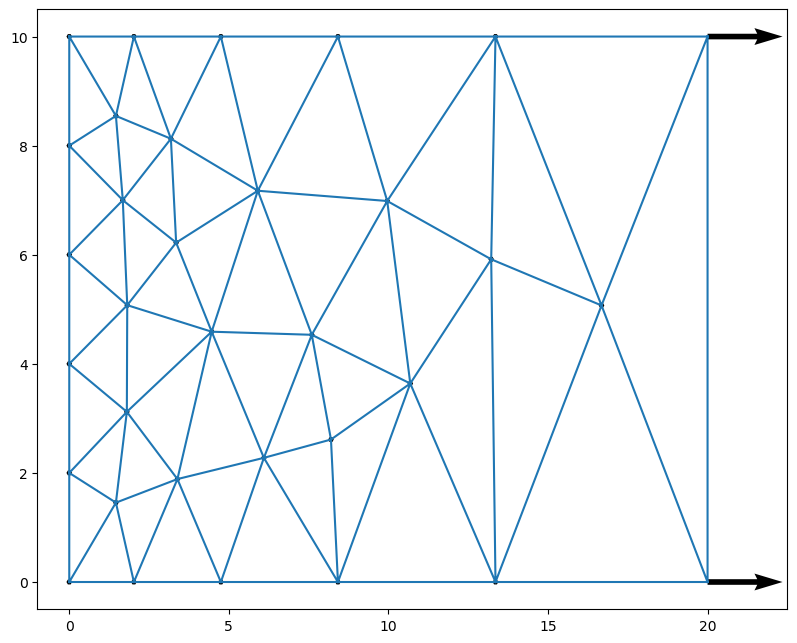

In [78]:
#plt.plot(MN[:,0],MN[:,1],'ok')

#plt.plot(MNE[:,0], MNE[:,1], label='Empotrados', lw = 5)
#plt.plot(MNT[:,0], MNT[:,1], label='Traccionados', lw = 5)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.2, 0.5, 0.6])
ax.triplot(MN[:,0],MN[:,1],MC-MC.min(), )
#ax.plot(MN[:,0],MN[:,1],'o')
ax.quiver( MN[:,0], MN[:,1], Fx/5, Fy, linewidth=5, units='width', scale=10000)
ax.set_xlim(-1, L+(Fx/400).max())

# Agregar Resulatados

In [56]:
import mefmods as mef

In [57]:
ETYPES = 2*np.ones(len(MC)).astype(int)

nu = 0.3

E = 210E9

MP = np.hstack(
        (
            np.ones((len(MC), 1)),
            np.ones((len(MC), 1))*nu,
            np.ones((len(MC), 1))*E
            )
        )

In [58]:
K = mef.ensamble(MC-1, MN-1, MP, 2, ETYPES, 'Chapa-Asimetrica-2021')

In [59]:
s

array([ 0,  1,  6,  7, 24, 25, 26, 27, 28, 29, 30, 31])

In [60]:
Fuerzas

array([[   0.],
       [   0.],
       [5000.],
       [   0.],
       [5000.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [

In [61]:
r

array([ 2,  3,  4,  5,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,
       58, 59, 60, 61, 62, 63, 64, 65])

In [62]:
#Desplazamientos[r] = 
Desplazamientos, FResultado = mef.resolvermef(r,s,K,Desplazamientos[s], Fuerzas[r], 'Chapa-Asimetrica-2021')

In [63]:
Exy = np.hstack( (Fuerzas.reshape(NumeroNodos, 2) , np.zeros((NumeroNodos, 1))) )

In [64]:
Rxy = np.hstack( (FResultado.reshape(NumeroNodos, 2) , np.zeros((NumeroNodos, 1))) )

In [65]:
Dxy = np.hstack( (Desplazamientos.reshape(NumeroNodos, 2) , np.zeros((NumeroNodos, 1))) )

In [66]:
Dxy

array([[ 0.00e+00,  0.00e+00,  0.00e+00],
       [ 9.45e-08,  7.18e-09,  0.00e+00],
       [ 9.45e-08, -7.11e-09,  0.00e+00],
       [ 0.00e+00,  0.00e+00,  0.00e+00],
       [ 1.04e-08,  5.00e-09,  0.00e+00],
       [ 2.26e-08,  6.82e-09,  0.00e+00],
       [ 3.95e-08,  7.28e-09,  0.00e+00],
       [ 6.29e-08,  7.20e-09,  0.00e+00],
       [ 6.28e-08, -7.15e-09,  0.00e+00],
       [ 3.95e-08, -7.23e-09,  0.00e+00],
       [ 2.25e-08, -6.82e-09,  0.00e+00],
       [ 1.04e-08, -5.04e-09,  0.00e+00],
       [ 0.00e+00,  0.00e+00,  0.00e+00],
       [ 0.00e+00,  0.00e+00,  0.00e+00],
       [ 0.00e+00,  0.00e+00,  0.00e+00],
       [ 0.00e+00,  0.00e+00,  0.00e+00],
       [ 7.75e-09, -1.15e-10,  0.00e+00],
       [ 2.72e-08, -3.10e-09,  0.00e+00],
       [ 5.01e-08,  2.02e-09,  0.00e+00],
       [ 1.54e-08,  3.61e-09,  0.00e+00],
       [ 1.44e-08, -3.56e-09,  0.00e+00],
       [ 7.87e-08, -7.10e-11,  0.00e+00],
       [ 2.82e-08,  3.92e-09,  0.00e+00],
       [ 2.00e-08,  5.65e-10,  0.0

# Guardo los resultados 

In [67]:
fext = gmsh.view.add('FuerzasExternas')
Fext = gmsh.view.addModelData(fext,0,modelname,'NodeData',NodeInfo[0],Exy)

In [68]:
despview = gmsh.view.add('Desplazamientos')
Desp = gmsh.view.addModelData(despview,0,modelname,'NodeData',NodeInfo[0],Dxy)

In [69]:
forview = gmsh.view.add('Fuerzas')
Fza = gmsh.view.addModelData(forview,0,modelname,'NodeData',NodeInfo[0], Rxy)

In [70]:
gmsh.fltk.run()

-------------------------------------------------------
Version       : 4.8.4
License       : GNU General Public License
Build OS      : Linux64-sdk
Build date    : 20210428
Build host    : gmsh.info
Build options : 64Bit ALGLIB ANN Bamg Blas[petsc] Blossom Cgns DIntegration Dlopen DomHex Eigen Fltk Gmm Hxt Jpeg[fltk] Kbipack Lapack[petsc] LinuxJoystick MathEx Med Mesh Metis Mmg Mpeg Netgen ONELAB ONELABMetamodel OpenCASCADE OpenCASCADE-CAF OpenGL OptHom PETSc Parser Plugins Png[fltk] Post QuadTri Solver TetGen/BR Voro++ Zlib[fltk]
FLTK version  : 1.4.0
PETSc version : 3.14.4 (real arithmtic)
OCC version   : 7.6.0
MED version   : 4.1.0
Packaged by   : geuzaine
Web site      : https://gmsh.info
Issue tracker : https://gitlab.onelab.info/gmsh/gmsh/issues
-------------------------------------------------------


In [71]:
gmsh.finalize()